# 2. 非線形方程式とroot-finding

### 概要
- 非線形方程式$f(x) = 0$の数値解を求めるアルゴリズムは、漸化式によって数列を生成して収束させることに基づいている。

### Key-words
- 反復法
- ニュートン法
- 二分法

### 参考

- Steffensen's method: https://www.youtube.com/watch?v=BTYTj0r5PZE

Import

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 前提

以下の仮定をおく

- $f:\mathbf R\to \mathbf R$
- $f(x)$ is a function that is real valued and that $x$ is a real variable.

### 反復法(iteration method)の原理

解きたい方程式 $f(x) = 0$を変形して、左辺が$x$だけからなる

$$
x = g(x)
$$

の形にする。

- `g`の不動点を求めよという意味になる。
- $x_{k+1} = g(x_k)$によって生成される数列がある値$\alpha$に収束すれば、$\alpha$は方程式$x = g(x)$の解
- `g`は連続関数でなければならない

### ナイーブな反復法

漸化式

$$
x_{k + 1} = x_k + h\cdot f(x_k)
$$

によって生成される数列がある値$\alpha$に収束すれば、$\alpha$は方程式$f(x) = 0$の解である。

- hはいわゆるlearning rateみたいなもの
- $f(x)$が単調増加なら $h > 0$, 単調減少ならば$ h < 0$

### [例題1]

ナイーブな反復法で$x^2 - 2 = 0$を解け

In [2]:
def naive_iterative_method(f, initial, h, eps = 1e-7, max_counter = 1000):
    x = initial
    counter = 0
    res = f(x)
    
    while abs(res) > eps and counter < max_counter:
        counter += 1
        x = max(x - h * f(x), 0)
        res = f(x)
    
    if counter >= max_counter:
        raise Exception("exceed max_counter")
    
    return x

In [3]:
naive_iterative_method(f = lambda x: x**2 - 2, initial = 2, h = 0.2, eps = 1e-15, max_counter = 100000)

1.4142135623730954

### Fixed pointの存在の証明
#### Theorem

Let $g \in C[a, b]$. Assume that $g([a, b]) \subset [a, b]$, i.e., $\forall x \in [a, b], g(x) \in [a, b]$.
Then $x = g(x)$ has at least one solution $\alpha$ in the interval $[a, b]$.

#### [証明]

$f(x) = x - g (x)$と定義すると、$f\in C[a, b]$.

さらに
$$
\begin{aligned}
f(a) &= a - g(a) \leq 0\\
f(b) &= b - g(b) \geq 0
\end{aligned}
$$

よってMean value theoremより$\exists x \in [a, b]$ such that $f(x) = 0$, i.e $x = g(x)$

### ニュートン法

- 以下の漸化式で定義される

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$


<img src = "https://github.com/RyoNakagami/omorikaizuka/blob/master/algorithm/newton_method.jpg?raw=true">


#### 手順

関数$y = f(x)$は$f(a) < 0, f(b) > 0$で区間 $(a, b)$ で$f''(x) > 0$とする。

```
INPUT
    f: function
    f': first order derivative of f
    initial value: the starting point
    eps: threshold
OUTPUT
    x, which is an approximate solution such that f(x) = 0

1. initial value x = b
2. x = x - f(x)/f'(x)
3. If abs(f(x) < eps, then return x1, else x0 = x1 and repeat the process from step 2
```



### ニュートン法の証明

Taylor expansion ruleより$f(\alpha) = 0$としたとき、$\alpha$近傍で展開すると、

$$
f(\alpha) = f(x_n) + f'(x_n)(\alpha - x_n) + R_1
$$

このとき剰余は

$$
R_1 = \frac{1}{2!}f''(\xi_n)(\alpha - x_n)^{2}
$$

なお、$\xi_n \in (\alpha, x_n)$.

$$
0 = f(\alpha) = f(x_n) + f'(x_n)(\alpha - x_n) + \tfrac12f''(\xi_n)(\alpha - x_n)^2
$$

$$
\frac {f(x_n)}{f'(x_n)}+\left(\alpha-x_n\right) = \frac {- f'' (\xi_n)}{2 f'(x_n)}\left(\alpha-x_n\right)^2
$$

Newton methodのupdate ruleを思い出すと

$$
x_{n+1} = x_{n} - \frac {f(x_n)}{f'(x_n)}
$$

Then,

$$
\underbrace{\alpha - x_{n+1}}_{\varepsilon_{n+1}} = \frac {- f'' (\xi_n)}{2 f'(x_n)} (\,\underbrace{\alpha - x_n}_{\varepsilon_{n}}\,)^2
$$

つまり、

$$
\varepsilon_{n+1} = \frac {- f'' (\xi_n)}{2 f'(x_n)} \cdot {\varepsilon_n}^2
$$


$$
\left| {\varepsilon_{n+1}}\right| = \frac {\left| f'' (\xi_n) \right| }{2 \left| f'(x_n) \right|} \cdot {\varepsilon_n}^2
$$


このとき、以下の三つの条件を仮定する：

1. $f'(x) \neq 0$; for all $x\in I$, where $I$ is the interval $[\alpha - r, \alpha + r]$ for some $r\geq |\alpha -x_0|$
2. $f''(x)$ is continuous for all $x \in I$
3. $x_0$ is sufficiently close to the root $\alpha$

となると、関数の連続性と閉空間と連続写像定理より

$$
\frac12 \left |{\frac {f'' (x_n)}{f'(x_n)}}\right |<C\left |{\frac {f''(\alpha)}{f'(\alpha)}}\right |
$$

また、$x_0$が十分$\alpha$に近いと仮定しているので

$$
C \left |{\frac {f''(\alpha)}{f'(\alpha)}}\right |\varepsilon_n<1
$$


よって

$$
\left | {\varepsilon_{n+1}}\right | \le M{\varepsilon_n}^2 \
$$

### [例題2]

ニュートン法で$f(x) = x^2 - 2 = 0$を解け

In [4]:
def newton_method(f, f_foc,  initial, eps = 1e-10, max_counter = 1000):
    x = initial
    counter = 0
    
    while abs(f(x)) > eps and counter < max_counter:
        h = f(x)/f_foc(x)
        x = x - h
        counter += 1
    
    if counter >= max_counter:
        raise Exception("exceed max_counter")
    
    return x
    

In [5]:
newton_method(f = lambda x: x**2 - 2, f_foc = lambda x: 2*x,  initial = 1, eps = 1e-10, max_counter = 100000)

1.4142135623746899

Newton-methodは目的関数が連続関数なだけでは適応できない。例として$f(x) = \text{sign}(x) \sqrt{|x|}$を考える。

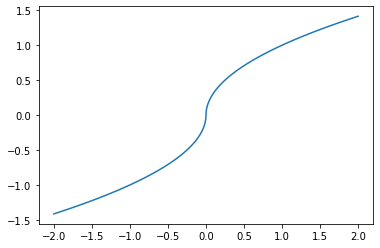

In [6]:
f = lambda x: np.sign(x)*np.sqrt(abs(x))
f_1 = lambda x: (1/2)*abs(x)**(-1/2)

x_range = np.linspace(-2, 2, 10000)
y_range = f(x_range)

plt.plot(x_range, y_range);

In [7]:
x = 10
counter = 0

while abs(f(x)) > 1e-7 and counter < 10:
    h = f(x)/f_1(x)
    x = x - h
    counter += 1
    print('step {}, x = {}'.format(counter, x))



step 1, x = -10.0
step 2, x = 10.0
step 3, x = -10.0
step 4, x = 10.0
step 5, x = -10.0
step 6, x = 10.0
step 7, x = -10.0
step 8, x = 10.0
step 9, x = -10.0
step 10, x = 10.0


In [8]:
del x, x_range, y_range, f, f_1

first derivativeが条件を満たさない場合も適用することができない

In [9]:
f = lambda x: x**(1/3)
Df = lambda x: (1/3)*x**(-2/3)
try:
    newton_method(f, Df, 0.1, max_counter = 10000)
except Exception as err:
    print('error message is as follows:\n', err)

error message is as follows:
 complex exponentiation


### Newton methodを視覚的に表現

In [10]:
def newton_method_viz(f, f_foc,  initial, eps = 1e-10, max_counter = 1000, callback = None):
    x = initial
    counter = 0
    
    while abs(f(x)) > eps and counter < max_counter:
        h = f(x)/f_foc(x)
        x1 = x - h
        if callback:
            err = np.abs(x1 - x)
            callback(x,x1,err, counter)
        counter += 1
        x = x1
    
    if counter >= max_counter:
        raise Exception("exceed max_counter")
    
    return x
    

In [11]:
def multiplot(fun,a=0,b=1,label='',show=False,legend=False,color='red'):
    '''Plots function fun on interval [a,b], or a dot if fun=[x,y], or vertical line if fun=[x]'''
    plt.figure(num=1, figsize=(10,8))
    if callable(fun):
        # function
        x = np.linspace(a,b,1000)
        y = [fun(x) for x in x]
        plt.plot(x,y,label=label,c=color)
        plt.xlim((a,b))
        plt.grid(True)
    elif isinstance(fun,list) and len(fun) in (3,4): # line
        if len(fun) == 3: # fun=[x ymin ymax]
            x, y = [fun[0],fun[0]], fun[1:] # vertical
        else: # fun=[x1 y1 x2 y2]
            x, y = fun[::2], fun[1::2]
        plt.plot(x,y,label=label,c=color)
    elif isinstance(fun,list) and len(fun)==2: # one dot
        x, y = fun
        plt.scatter(x,y,label=label,c=color)
    if legend:
        plt.legend()
    if show:
        plt.show()

def newton_viz(x0,a,b):
    g = lambda x: -4*x**3+5*x+1
    h = lambda x: -12*x**2+5
    ylim=[g(a),min(g(b),0)]
    def callback(x,x1,err, counter):
        print('iter=%3d x=%12.8f err=%1.3e' % (counter, x,err))
        if err>0.01: # plot only if sufficiently far from the solution
            multiplot([a,0,b,0],color='grey')
            plt.title('Step %d' % counter)
            multiplot(g,a=a,b=b,color='red')
            multiplot([x,0],a=a,b=b,color='green')
            multiplot([x,0,g(x)],a=a,b=b,color='green')
            multiplot([x,0,f(x)],a=a,b=b,color='green')
            multiplot(lambda z: h(x)*(z - x1),a=a,b=b,color='blue')
            multiplot([x,0],a=a,b=b,color='red',show=True)
    root = newton_method_viz(g, h, x0, callback=callback)
    print('Solution is ',root)

iter=  0 x= -2.00000000 err=5.349e-01


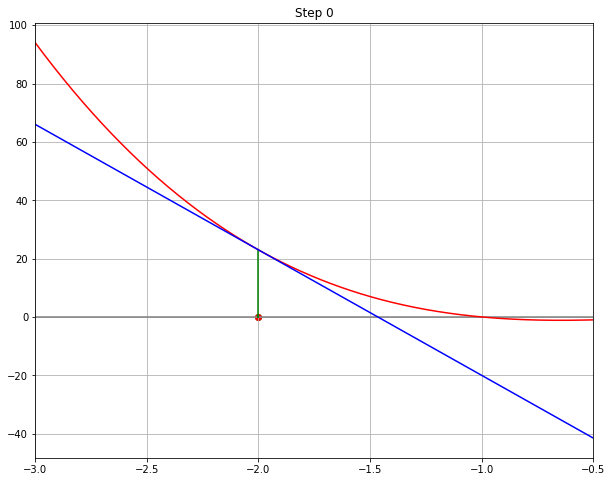

iter=  1 x= -1.46511628 err=3.013e-01


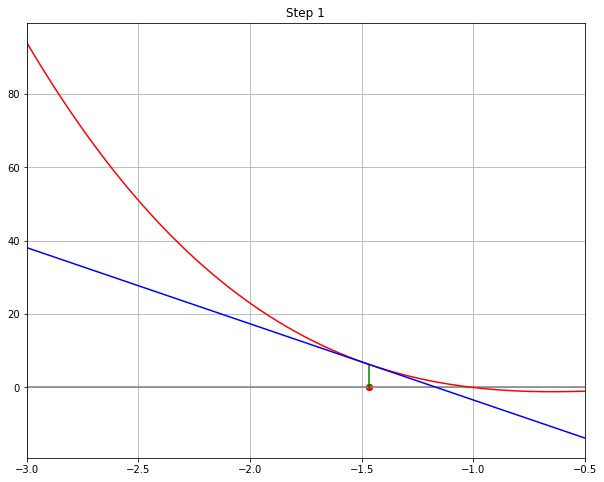

iter=  2 x= -1.16383222 err=1.321e-01


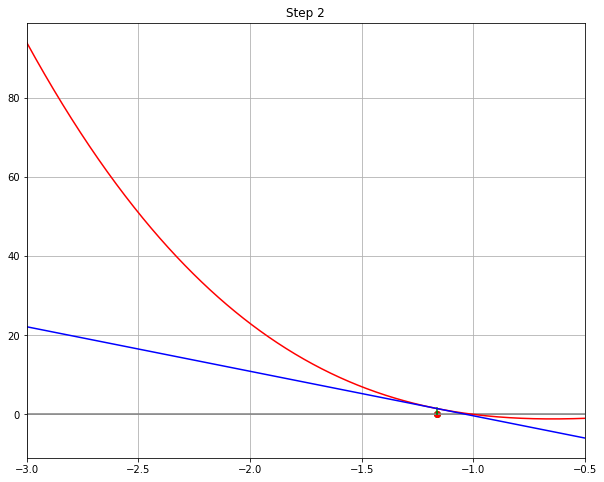

iter=  3 x= -1.03174598 err=3.016e-02


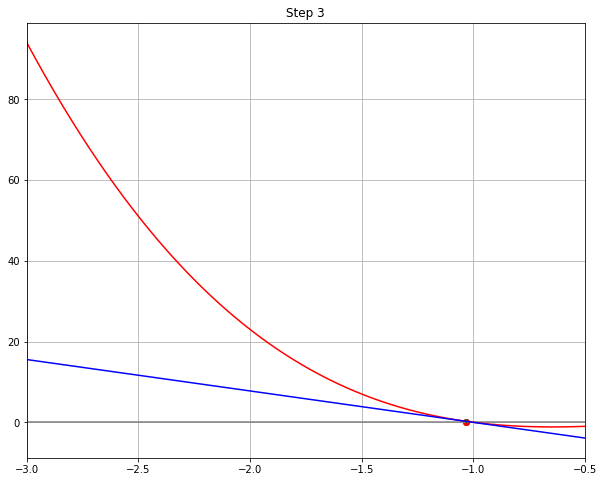

iter=  4 x= -1.00158858 err=1.584e-03
iter=  5 x= -1.00000431 err=4.307e-06
iter=  6 x= -1.00000000 err=3.180e-11
Solution is  -1.0


In [12]:
newton_viz(-2.0,-3,-.5)

iter=  0 x= -0.50000000 err=5.000e-01


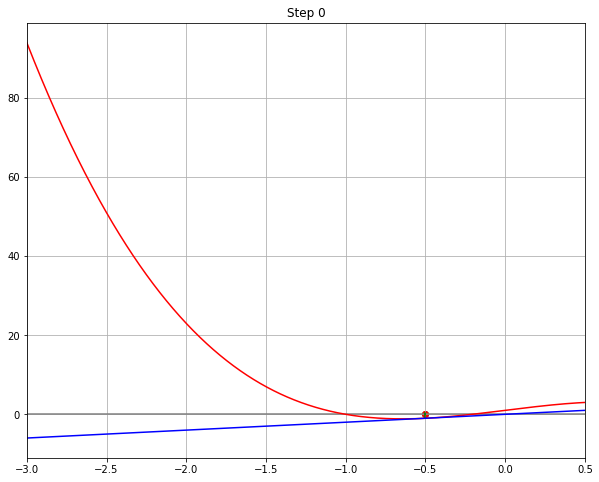

iter=  1 x=  0.00000000 err=2.000e-01


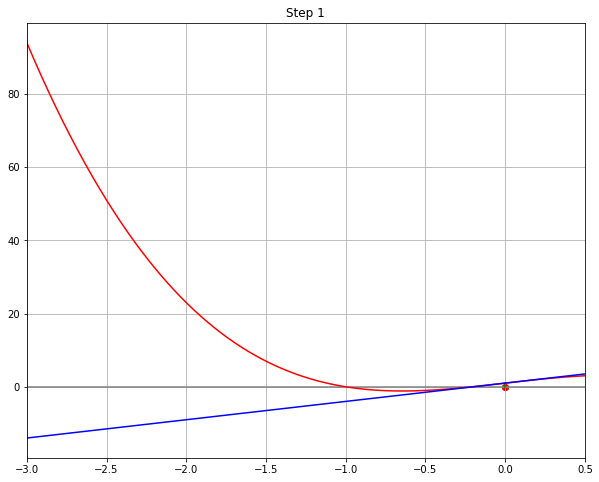

iter=  2 x= -0.20000000 err=7.080e-03
iter=  3 x= -0.20707965 err=2.713e-05
iter=  4 x= -0.20710678 err=4.079e-10
Solution is  -0.20710678118654752


In [13]:
newton_viz(-.5,-3,.5)

### p次収束

$\alpha$に収束する数列を$\{x_k\}$とする。ある定数 $C > 0$ が存在し、十分大きなkについて

$$
|x_{k + 1} - \alpha| \leq C |x_k - \alpha|^p
$$

が成り立つとき、数列$\{x_k\}$は$\alpha$にp次収束するという

### [例題3]

$$
x_{k + 1} = x_k - 0.2 (x^2_k - 2)
$$

によって生成される数列は$\alpha = \sqrt 2$に一次収束することを示せ


#### 解

両辺から$\sqrt 2$を引いて整理すると、

$$
\begin{aligned}
x_{k+1} - \sqrt 2 & = (x_{k} - \sqrt 2 ) - 0.2 (x_{k} - \sqrt 2 )(x_{k} + \sqrt 2 )\\
& = (x_{k} - \sqrt 2 )[1 - 0.2(x_{k} + \sqrt 2 )]
\end{aligned}
$$

従って、$k \to \infty$のとき

$$
\begin{aligned}
\frac{|(x_{k+1} - \sqrt 2 )|}{|(x_{k} - \sqrt 2 )|} = |1 - 0.2(x_{k} + \sqrt 2 )| \to [1 - (\sqrt 2  + \sqrt 2 )] = 0.434...
\end{aligned}
$$

Then, 十分大きなkについて

$$
|(x_{k + 1} - \sqrt 2 )| \leq 0.44|(x_{k} - \sqrt 2 )|
$$


### ナイーブな反復法の収束の速さ

$$
x_{k + 1} = x_k - h\cdot f(x_k)
$$

は解$\alpha$に一次収束する。


#### [証明]

$f(x) = (x - \alpha)q(x)$と表し、$|q(\alpha)| < \infty$を仮定する。

このとき、

$$
\begin{aligned}
x_{k + 1} - \alpha &= (x_k - \alpha) - h \cdot(x_k - \alpha)q(x_k)\\
&= (x_k - \alpha)[1 - h \cdot q(x_k)]
\end{aligned}
$$


よって、十分大きなkのとき、

$$
\frac{|x_{k+1} - \alpha|}{|x_{k} - \alpha|} = [1 - h \cdot q(x_k)] \to [1 - h \cdot q(\alpha)] < \infty
$$


### [例題4]: ニュートン法の収束の速さ

$$
x_{k + 1} = x_k - \frac{x_k^2 - 2}{2x_k}
$$

によって生成される数列は$\alpha = \sqrt 2$に2次収束することを示せ。

#### [解]

$$
\begin{aligned}
x_{k + 1} - \sqrt 2 &= x_k - \sqrt 2 - \frac{x_k^2 - 2}{2x_k}\\
&= (x_k - \sqrt 2)[1 - \frac{x_k + \sqrt 2}{2x_k}]\\
&= \frac{(x_k - \sqrt 2)^2}{2x_k}
\end{aligned}
$$

従って、$k \to \infty$のとき、

$$
\frac{|x_{k + 1} - \sqrt 2|}{|x_{k} - \sqrt 2|} = \left|\frac{1}{2x_k}\right| \to \left|\frac{1}{2\sqrt 2}\right| 
$$

### ニュートン法の収束の速さ

（上のニュートン法の証明でも明らかだが、）

$$
x_{k + 1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

は単解には２次収束し、重解には１次収束する。

#### [証明]
(1) $\alpha$が$f(x) = 0$の単解のとき、

$$
f(x) = (x - \alpha)q(x)
$$

ただし、$|q(\alpha)|, |q'(\alpha)| < \infty$を仮定する。このとき$f(x)$を微分すると、

$$
f'(x) = q(x) + (x - \alpha)q'(x)
$$

これをnewton methodのupdate algorithmに当てはめると

$$
x_{k + 1} - \alpha = \frac{(x_k - \alpha)^2q'(x_k)}{q(x_k) + (x_k - \alpha)q'(x_k)}
$$

従って、$k \to \infty$のとき

$$
\frac{|x_{k + 1} - \alpha|}{|x_{k} - \alpha|^2} = \left|\frac{q'(x_k)}{q(x_k) + (x_k - \alpha)q'(x_k)}\right|\to \left|\frac{q'(\alpha)}{q(\alpha)}\right|<\infty
$$

この証明は$\alpha$が重解の時には分母が$q(\alpha) = 0$となるので使用できない。

(2) $\alpha$が$f(x) = 0$の重解のとき、

$$
f(x) = (x - \alpha)^2q(x)
$$

上と同様に

$$
f'(x) = 2(x - \alpha)q(x) + (x - \alpha)^2q'(x) = (x - \alpha)[2q(x) + (x - \alpha)q'(x)]
$$

Then,

$$
x_{k+1} - \alpha = (x_k - \alpha)\left[1 - \frac{q(x_k)}{2q(x) + (x - \alpha)q'(x)}\right]
$$

従って、$k \to \infty$のとき

$$
\frac{|x_{k + 1} - \alpha|}{|x_{k} - \alpha|^2} = \left|1 - \frac{q(x_k)}{2q(x) + (x - \alpha)q'(x)}\right| \to \frac{1}{2}
$$

同様にm重解の場合は

$$
\frac{|x_{k + 1} - \alpha|}{|x_{k} - \alpha|^2}  \to \frac{m - 1}{m}
$$


### 割線法：Secant Method

$$
x_{k+2} = x_{k+1} - \frac{f(x_{k+1})(x_{k+1} - x_k)}{f(x_{k + 1}) - f(x_k)}
$$


```
INPUT
    f: function
    x0: the starting point
    x1: the starting point
    eps: threshold
OUTPUT
    x, which is an approximate solution such that f(x) = 0

1. x2 = x1 - f(x1)(x1 - x0)/(f(x1) - f(x0))
2. If abs(f(x2) < eps, then return x2, else x0 = x1, x1 = x2 and repeat the process from step 1
```

### [例題5]
Secant Methodで$f(x) = x^2 - 2 = 0$を解け

In [14]:
def secant_method(f, x0, x1, eps = 1e-7, max_counter = 1000, callback = None):
    counter = 0
    while abs(f(x1)) > eps and counter < max_counter:
        counter += 1
        x1, x0 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0)), x1
        if callback:
            err = abs(f(x1))
            callback(x0, x1, err, counter)
        
    if counter >= max_counter:
            raise Exception("exceed max_counter")
        
    return x1

In [15]:
secant_method(f = lambda x: x**2 - 2, x0 = 0, x1 = 1)

1.4142135620573204

In [16]:
def secant_viz(x0, x1, a, b):
    g = lambda x: x**3 - x**2 - 1
    ylim=[g(a),min(g(b),0)]
    def callback(x0, x1 ,err, counter):
        print('iter=%3d x=%12.8f err=%1.3e' % (counter, x1,err))
        h = (g(x1) - g(x0))/(x1 - x0)
        print(h)
        if err>0.01: # plot only if sufficiently far from the solution
            multiplot([a,0,b,0],color='grey')
            plt.title('Step %d' % counter)
            multiplot(g,a=a,b=b,color='red')
            multiplot([x1,0],a=a,b=b,color='green')
            multiplot([x1,0,g(x1)],a=a,b=b,color='green')
            multiplot([x1,0,f(x1)],a=a,b=b,color='green')
            multiplot(lambda z: h*(z - x0) + g(x0) ,a=a,b=b,color='blue')
            multiplot([x1,0],a=a,b=b,color='red',show=True)
    root = secant_method(g, x0, x1, callback=callback)
    print('Solution is ',root)

iter=  1 x=  0.50000000 err=1.125e+00
2.75


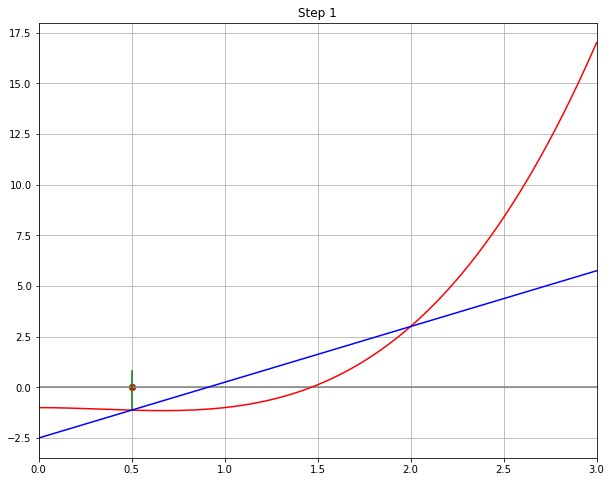

iter=  2 x=  0.90909091 err=1.075e+00
0.12190082644628118


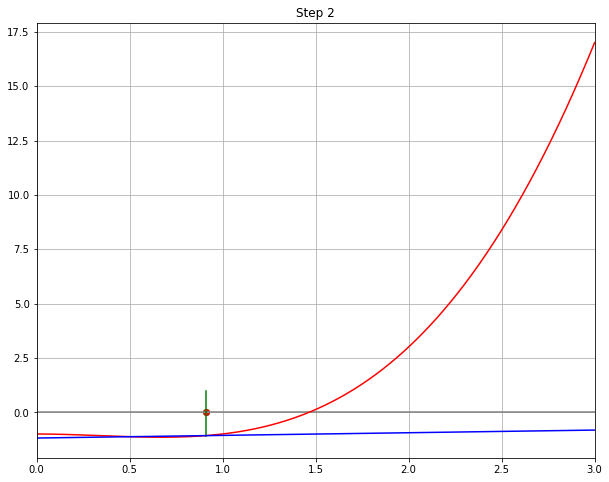

iter=  3 x=  9.72881356 err=8.252e+02
93.68273104764684


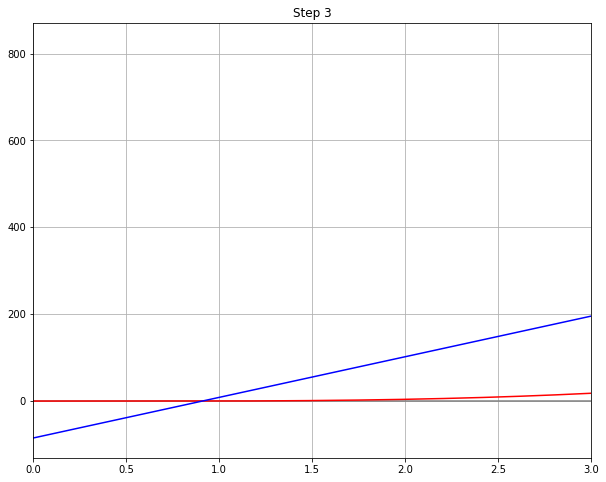

iter=  4 x=  0.92056721 err=1.067e+00
93.80390327607401


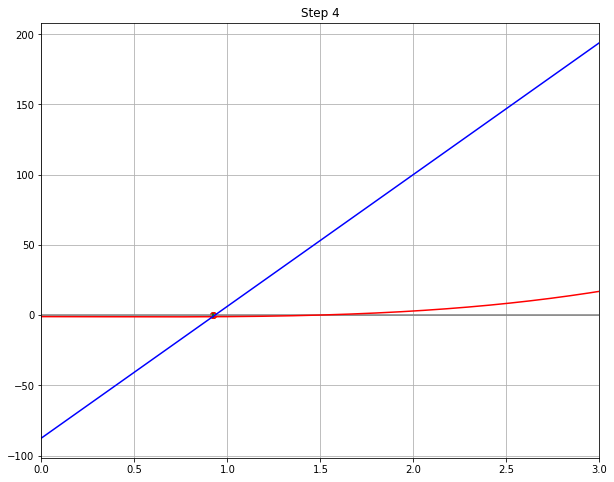

iter=  5 x=  0.93194536 err=1.059e+00
0.721371921448533


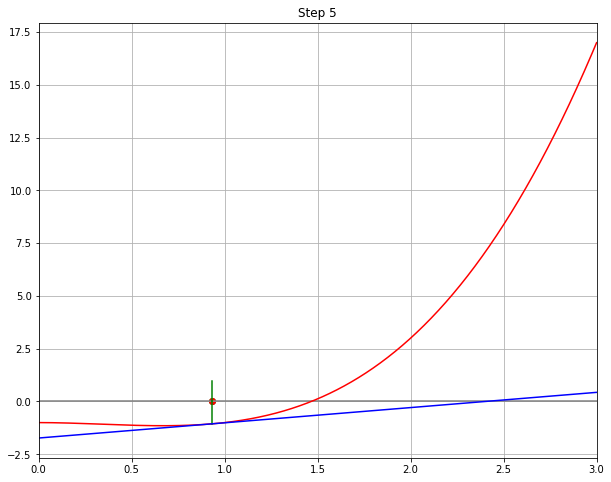

iter=  6 x=  2.40012971 err=7.066e+00
5.533859442821861


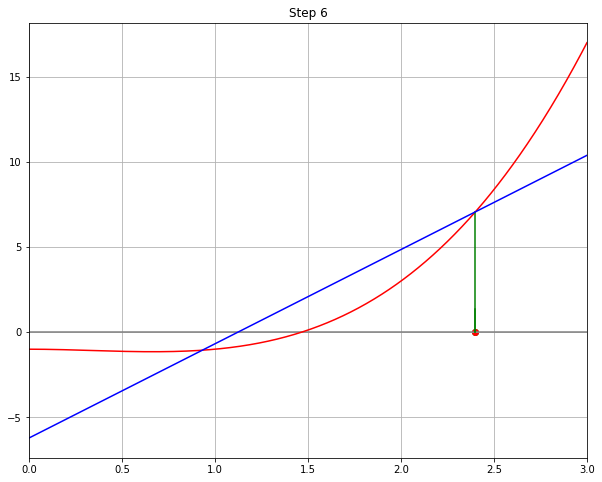

iter=  7 x=  1.12333204 err=8.444e-01
6.195178320869675


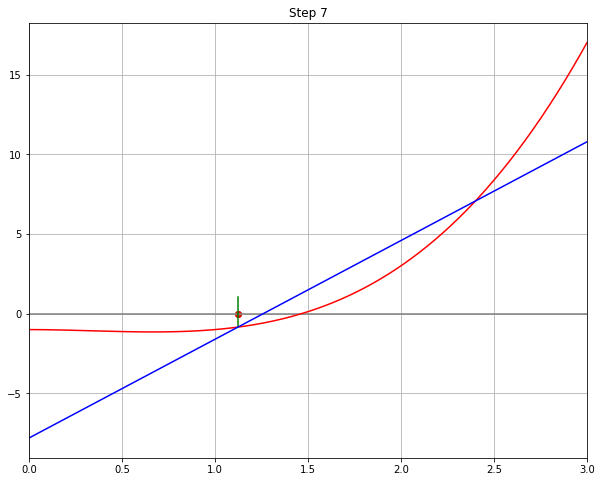

iter=  8 x=  1.25962681 err=5.881e-01
1.8805548638828682


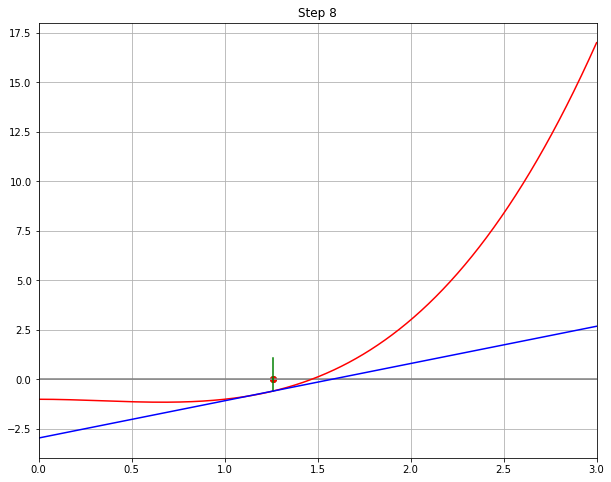

iter=  9 x=  1.57233271 err=4.149e-01
3.207482764486364


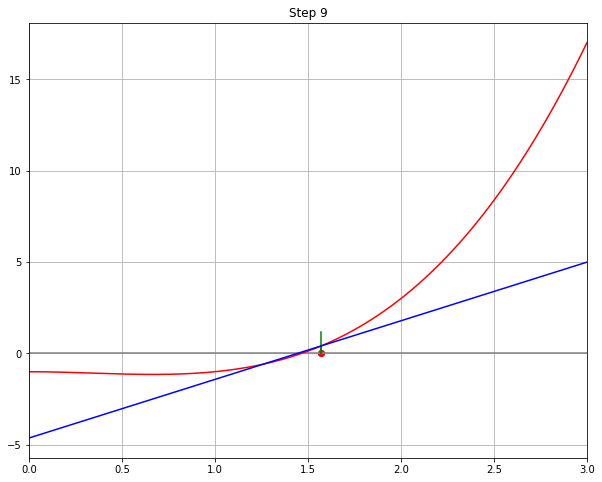

iter= 10 x=  1.44296703 err=7.767e-02
3.8079085328811866


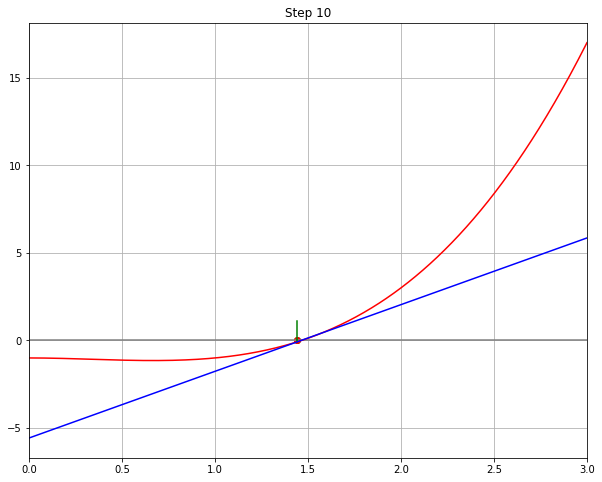

iter= 11 x=  1.46336523 err=7.732e-03
3.4288471835504013
iter= 12 x=  1.46562027 err=1.723e-04
3.5052328234503407
iter= 13 x=  1.46557113 err=3.680e-07
3.512720853575894
iter= 14 x=  1.46557123 err=1.745e-11
3.5125542867248836
Solution is  1.4655712318718006


In [17]:
secant_viz(0, 2, 0,3)

### 割線法の収束の速さ

割線法は1.618次収束であることが知られている。

#### [証明]

- $x_n = \alpha + e_n$
- $x_{n+1} = \alpha + e_{n+1}$
- $f(\alpha) = 0$

そして、$e_{n+1} = Ke_n^p$ where K is a constant。この$p$が黄金比$1.618...$であることを以下証明する。

まずsecant methodのupdate ruleは

$$
\begin{aligned}
x_{n+1} &= \frac{f(x_n)x_{n-1} - f(x_{n-1})x_n}{f(x_n) - f(x_{n-1})}\\
&= x_n - \frac{f(x_n)(x_n - x_{n-1})}{f(x_n) - f(x_{n - 1})}
\end{aligned}
$$

両辺から$\alpha$を引くと

$$
e_{n + 1} = \frac{f(x_n)e_{n-1} - f(x_{n-1})e_n}{f(x_n) - f(x_{n-1})} \tag{1}
$$

ここでmean value Theoremより$\exists \eta_n \in [x_n, \alpha]$ such that

$$
f'(\eta_n) = \frac{f(x_n) - f(\alpha)}{x_n - \alpha}
$$

よって、

$$
f(x_n) = e_n f'(\eta_n)
$$


これを上の式(1)の代入すると、

$$
e_{n+1} = e_ne_{n-1}\frac{f'(\eta_n)- f'(\eta_{n - 1})}{f(x_n) - f(x_{n-1})}
$$

Then,

$$
e_{n+1} \propto e_ne_{n-1}
$$

これを収束率$e_n\propto e_{n-1}^p$と併せて考えると、

$$
e_n^p \propto e_{n-1}^{p+1} \text{ i.e } e\propto e_{n-1}j^{(p+1)/p}
$$

つまり
$$
p = \frac{p+1}{p}
$$

を得る。これを解くと$p > 0$より$p = \frac{1+ \sqrt 5}{2}$

### 二分法：Bisection method
#### 中間値の定理
ある実数a, bについて$f(a)f(b)\leq 0$, $f(a)\neq f(b)$とする。この時、$f(x)$が連続関数ならば、$f(\alpha) = 0$を満たす$\alpha$が$[a, b]$に存在する。

#### [証明]

$f(a) < f(b)$について証明する。$f(a) < 0 < f(b)$とする。次に集合を以下のように定義する

$$
S = \{x | a \leq x < b, f(x) \leq 0\}
$$

Sは実数の部分集合かつ上に有界なので、上限cが存在する。上限cの定義より集合Sの数列$\{x_n\}$が取れて、$\lim_{n\to \infty} x_n = c$である。

関数$f(x)$の連続性より

$$
c = \lim f(x_n)\leq 0
$$

cの定義と$0 < f(b)$より$c < b$. 仮に$f(c) < 0$とすると、$f(x)$のc点での連続性より、正の実数$\epsilon$が存在して

$$
x\in (c, c + \epsilon)\Rightarrow f(x)< 0
$$

これは、Sの上限がcであることに反する。よって、$f(c) = 0$

### 二分法のアルゴリズム

```
1. Start

2. Define function f(x)

3. Input 
	a. Lower and Upper guesses x0 and x1
	b. tolerable error e
	
4. If f(x0)*f(x1) > 0
	print "Incorrect initial guesses"
   	goto 3
   End If

5. Do 
	x2 = (x0+x1)/2
	
	If f(x0)*f(x2) < 0
		x1 = x2
	Else
		x0 = x2
	End If
		
   while abs(f(x2)) > e
   
6. Print root as x2

7. Stop
```

In [18]:
def bisection_method(f, x0, x1, eps = 1e-7, max_counter = 1000):
    if f(x0)*f(x1) > 0:
        raise InputError
    x2 = x1
    counter = 0
    while abs(f(x2)) > eps and counter < max_counter:
        x2 = (x0 + x1)/2
        counter += 1
        if np.sign(f(x1))*np.sign(f(x2)) < 0: ## サインを使用しているのはoverflow, underflowを避けるため
            x0 = x2
        else:
            x1 = x2
    
    if counter >= max_counter:
        raise Exception("exceed max_counter")
    
    return x2

### [例題6]

2分法で$f(x) = x^2 - 2 =0$を解け

In [19]:
bisection_method(lambda x: x**2 - 2, 1.4, 1.5, eps = 1e-15, max_counter = 100)

1.4142135623730951

### [例題7]

$f(x) = x^6 - x - 1 = 0$の最も大きいrootを見つけよ

#### [解]
```
1. define function f
2. plot the graph of the function f
3 make a initial guess
4. compute the root using the bisection method
```

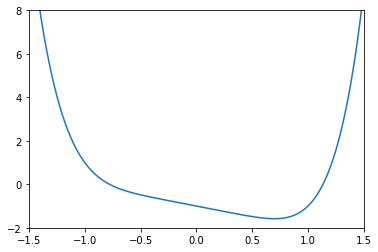

In [20]:
f = lambda x: x**6 - x - 1
x = np.linspace(-2, 2, 10000)
y = f(x)

plt.plot(x, y)
plt.xlim([-1.5, 1.5]); 
plt.ylim([-2, 8]);

In [21]:
alpha = bisection_method(f, 0.5, 1.5, eps = 1e-15, max_counter = 1000)
print(alpha, f(alpha))

1.1347241384015194 -8.881784197001252e-16


### 二分法と計算回数

$$
b_{n+1} - a_{n+1} = \frac{1}{2}(b_n - a_n)
$$

and

$$
b_{n} - a_{n} = \frac{1}{2^n}(b_0 - a_0)
$$

ここで

$$
c_n = \frac{a_n + b_n}{2}
$$

とする。すると

$$
|\alpha - c_n|\leq c_n - a_n = b_n - c_n = \frac{1}{2}(b_n - a_n)
$$

よって

$$
|\alpha - c_n| \leq \frac{1}{2^n}(b - a)
$$

tolerance levelを$\epsilon$とした時、計算終了は

$$
\frac{1}{2^n}(b - a) \leq \epsilon
$$

すると試行回数$n$は

$$
n \geq \frac{\log ((b - a)/\epsilon)}{\log 2}
$$

で計算できる

### Steffensen’s Method

- Aitken's squared delta methodとfixed point algorithmを組み合わせたもの
- give quadratic convergence
- $f \in C^3[a, b]$が必要条件

```
[INPUT]
    init0 : initial approximation
    TOL   : toleranace
    N0    : maximum number of iterations
    
[OUTPUT]
    Approximate solution p, or failure message.
    
[PROCESS]
    set i = 1
    p0 = init0
    while i <= N0 do
        set p1 = g(p0), p2 = g(p1)
        p = p2 - (p2 - p1)**2/(p2 - 2* p1 + p0)
        
        if abs(p - p0) < TOL then
            return p
            stop program
        set i = i + 1
        set p0 = p
        
    raise Error "Failure after N0 iterations"
```

### [例題8]

$$
f(x) = x^3 + 4x^2 - 10 = 0
$$

をSteffensen's Methodを用いて解け


#### [解]

Fixed pointでは以下の式が成立する

$$
\begin{aligned}
x^3 + 4x^2 - 10 &= 0\\
\Rightarrow & x^3 = 10 - 4x^2\\
\Rightarrow & x = \frac{10}{x^2} - 4\\
\Rightarrow & x = \sqrt{\frac{10}{x + 4}}
\end{aligned}
$$

Then, the update rule is

$$
p_{n + 1} = g(p_n) = \sqrt{\frac{10}{x_n + 4}}
$$

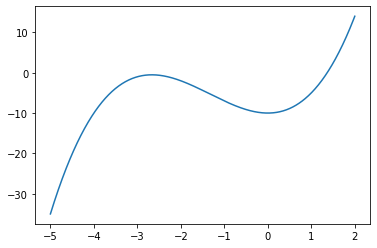

In [48]:
x = np.linspace(-5, 2, 1000)
f = lambda x: x**3 + 4 * x**2 - 10 
y = f(x)

plt.plot(x , y);

In [5]:
def steffensen(g, init0 , tol = 1e-7 ,max_counter = 5000):
    i = 1
    p0 = init0
    while i <= max_counter:
        p1 = g(p0)
        p2 = g(p1)
        p = p2 - (p2 - p1)**2/(p2 - 2* p1 + p0)
        if abs(p - p0) < tol:
            return p
        i += 1
        p0 = p
    raise Exception("Failure after {} iterations".format(max_counter))

In [20]:
g = lambda x: np.sqrt(10/(x + 4))
steffensen(g = g, init0 = 1 , tol = 1e-7 ,max_counter = 5000)

1.3652300134140969

### Steffensen's Method 2.0

$$
x_{n+ 1} = x_n - \frac{(f(x_n))^2}{f(x_n + f(x_n)) - f(x_n)}
$$


In [49]:
def steffensen_adj(f, init0 , tol = 1e-7 ,max_counter = 5000):
    i = 1
    p0 = init0
    g = lambda x: x - f(x) ** 2/(f(x + f(x)) - f(x))
    while i <= max_counter:
        p = g(p0)
        if abs(p - p0) < tol:
            return p
        i += 1
        p0 = p
    raise Exception("Failure after {} iterations".format(max_counter))
        

In [50]:
steffensen_adj(f = f, init0 = 1 , tol = 1e-7 ,max_counter = 5000)

1.3652300134140987

In [51]:
%%timeit
steffensen_adj(f = f, init0 = 1 , tol = 1e-7 ,max_counter = 5000)

1.23 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [52]:
%%timeit
steffensen(g = g, init0 = 1 , tol = 1e-7 ,max_counter = 5000)

20.6 µs ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## [演習問題]

### [1]

$f(x0 = x^2 - p = 0$をニュートン法で解くときの漸化式が

$$
x_{k + 1} = ax_k + \frac{b}{x_k}
$$
となるようにa, bをpの値で示せ

#### [解]

$$
\begin{aligned}
x_{k+1} &= x_k - \frac{x_k^2 - p}{2x_k}\\
& = \frac{1}{2}x_k - \frac{p/2}{x_k}
\end{aligned}
$$



### [2]

newton-methodで初期値を微妙にずらすだけで、収束先が異なることを確認せよ

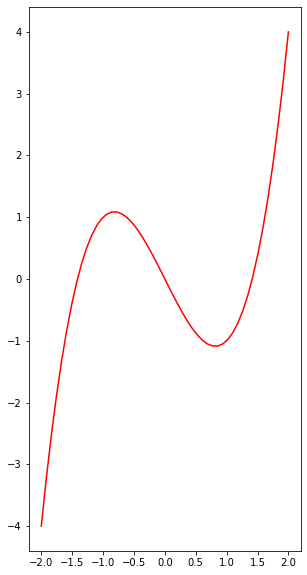

In [22]:
f = lambda x : x**3 - 2*x
x = np.linspace(-2, 2)
y = f(x)

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(x,y, color="red")
ax.set_aspect('equal')

In [23]:
def newton_viz_2(x0,a,b):
    g = lambda x : x**3 - 2*x
    h = lambda x: 3*x**2 - 2
    ylim=[g(a),min(g(b),0)]
    def callback(x,x1,err, counter):
        print('iter=%3d x=%12.8f err=%1.3e' % (counter, x,err))
        if err>0.01: # plot only if sufficiently far from the solution
            multiplot([a,0,b,0],color='grey')
            plt.title('Step %d' % counter)
            multiplot(g,a=a,b=b,color='red')
            multiplot([x,0],a=a,b=b,color='green')
            multiplot([x,0,g(x)],a=a,b=b,color='green')
            multiplot([x,0,f(x)],a=a,b=b,color='green')
            multiplot(lambda z: h(x)*(z - x1),a=a,b=b,color='blue')
            multiplot([x,0],a=a,b=b,color='red',show=True)
    root = newton_method_viz(g, h, x0, callback=callback)
    print('Solution is ',root)

iter=  0 x=  0.75000000 err=3.450e+00


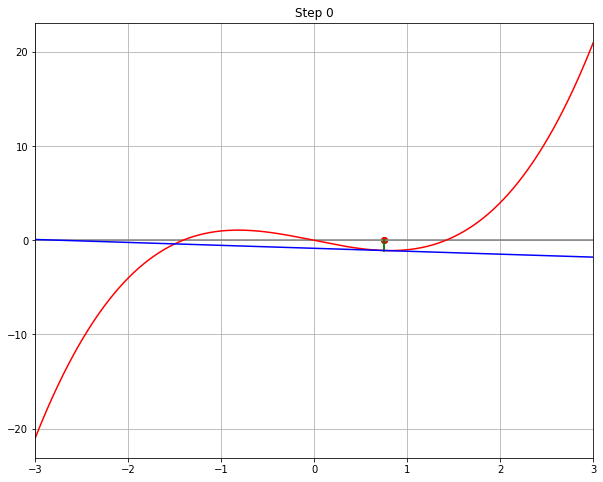

iter=  1 x= -2.70000000 err=7.188e-01


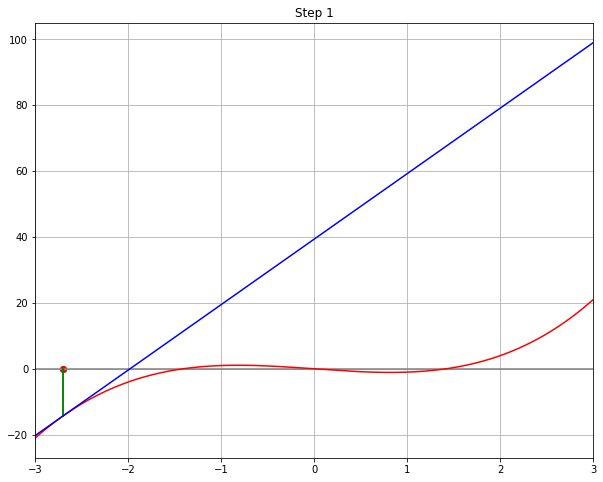

iter=  2 x= -1.98117765 err=3.902e-01


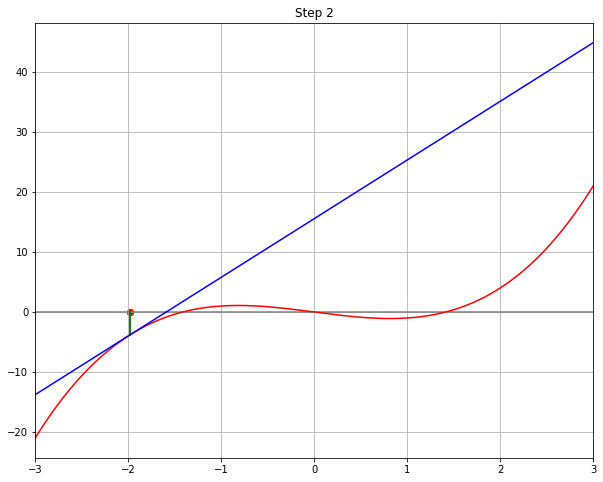

iter=  3 x= -1.59101708 err=1.511e-01


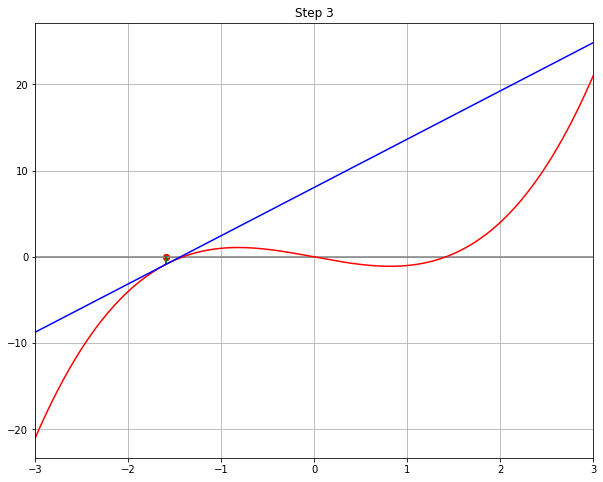

iter=  4 x= -1.43989754 err=2.501e-02


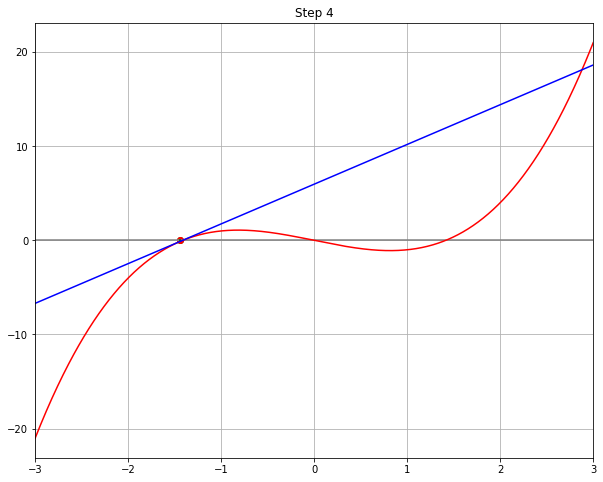

iter=  5 x= -1.41488481 err=6.708e-04
iter=  6 x= -1.41421404 err=4.774e-07
Solution is  -1.4142135623733367


In [24]:
### 0.75スタート
newton_viz_2(0.75, a = -3, b = 3)

iter=  0 x=  0.50000000 err=7.000e-01


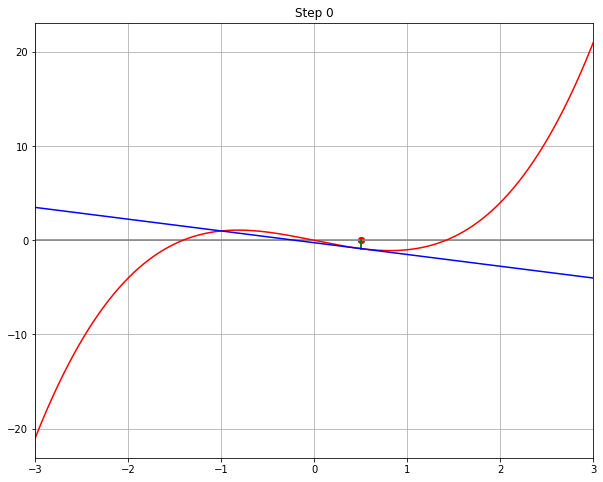

iter=  1 x= -0.20000000 err=2.085e-01


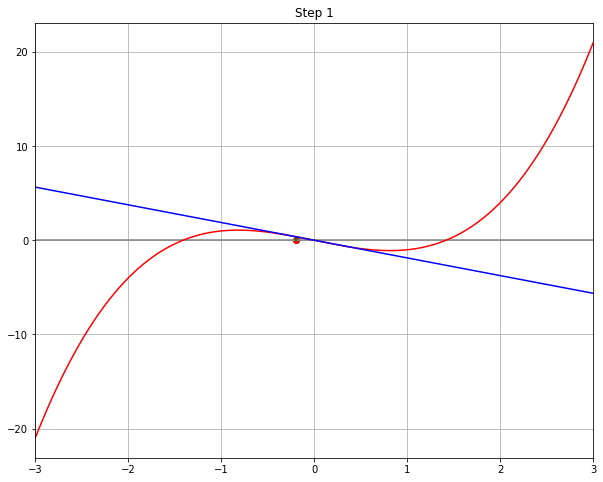

iter=  2 x=  0.00851064 err=8.511e-03
iter=  3 x= -0.00000062 err=6.165e-07
Solution is  2.3431048903422083e-19


In [25]:
### 0.5スタート
newton_viz_2(0.5, a = -3, b = 3)

### [3]

黄金比をニュートン法で解け

In [26]:
newton_method(f = lambda x: x**2 - x - 1, f_foc = lambda x:2*x - 1, initial = 1)

1.618033988749989

### [4]

以下の方程式の複素解をニュートン法で求めよ

$$
f(x) = x^2 -2x + 2 = 0
$$

In [27]:
a = newton_method(f = lambda x: x**2 - 2*x + 2, f_foc = lambda x:2*x - 2, initial = 1 + 2j)
b = newton_method(f = lambda x: x**2 - 2*x + 2, f_foc = lambda x:2*x - 2, initial = 1 - 2j)
print(a, b)

(1+1.000000000000001j) (1-1.000000000000001j)
